# Lesson 1

## Introduction

One could think that the main object of data analysis is a set of observations $ \{x_i\} $ and an existing relationship between these measurements. These assumptions are mainly a belief that there is a deeper reality besides the measurement. For us, this relation is materialized by the probability distribution $P$.

The probability of a measument $x$ given an a hypothesis $\theta$ is $$P(x|\theta).$$ There are two main methods of working in this space.

* Parametric methods: We know the probability distribuition, or at least we think so, then we can simulate a sample;

* Unparametric methods: We do not know the probability distribuition, therefore, we try to discover it via our observations set.



## Dataset description

We begin by describing our dataset. For instance, say we have a set observation of the position of galaxies in our sky. If we start by applying statistics to their actual position, we would be inclined to a specific probability distribution $P$. Moreover, if we decide to "clump" our galaxies into particular pixels, we would find a whole new distribution.

Furthermore, it is maximal that we correctly describe our data statistically. Let us say we have two different distributions:

$$.\;.\;.\;.\;.\;.\;.\;.\;.\;.\;.\; \{x_1\}$$

$$........... \{x_2\}$$

If we were to calculate the mean value of both, we would get the same value $\overline{x}$, but it is clear that these dataset are very diferent. Therefore, we must calculate other metrics.

## Computational methods

We shall use computational methods to generate a sample $\{x_i\}^N$ and calculate the value of $P(x)$ for every generated point. The first problem we will encounter is the fact that computers are intrinsically integer finite machines. 

The solution to our integrity problem lies in floating-point numbers. We shall give a tuple of an integer, and the position of the point. This is the definition of ***float values***!  (づ￣ ³￣)づ

Now, to solve the finiteness problem, we implement interpolation. Intead of calculating every value $P(x)$, we will use two calculated values for $(x_1;P(x_1))$ and $(x_2; P(x_2))$ to find a third without the explicit calculation $P(x)$. As an example, we can find the value of $P(x)$ via a linear interpolation 
$$ 
\overline{P}(x) = P_1 + (P_2 - P_1)\frac{(x-x_1)}{(x_2-x_1)} \;;\; x_1<x<x_2
$$

Then, our fucntion will be described by

$$
P(x) = \left\{
    \begin{array}\\
        P(x_1) & \mbox{if } \ x = x_1 \\
        \overline{P}(x) & \mbox{if } \ x = x \\
        P(x_2) & \mbox{if } \ x=x_2 \\
        \vdots
    \end{array}
\right.
$$

We could use interpolation of a greater order. However, these methods are much more complex and require descriptions of the differential of $\overline{P}(x)$  to impose continuity of the function.

## Random varibles

Given a probability distribution $P(x)$, we define

$$
C(x) = \int_a^b P(x) dx.
$$

Furthermore, let us say $x$ is a random variable, with an expected value

$$
\langle x> = \int P(x) x dx.
$$

Therefore, if $x$ is a random variable, then $C(x)$ will also be a random variable. Moreover, we might ask what is the probability of $C(x)$ be equal a certain value. This will give us a probability distribuition for $C$, 

$$
P(C = C_0) = \int P(x) \delta(C(x) - C_0(x)) dx.
$$

This integral is easy to solve. By the definition of $C(x)$, we know $\partial_x C(x) = P(x)$. Since the probability distribution is a positive definite function, $C(x)$ is a monotonic function, i.e., $C$ is an inversible function. Now, because $C$ is inversible, the argument of the Dirac's delta function is defined on only one point $C(x_0) = C_0$. Replacing $C_0(x)$ by $C(x_0)$ on the integral, and using the fact that

$$
\delta(f(x)) = \frac{\delta(x-x_0)}{\left|\frac{\partial f(x_0)}{\partial x}\right|},
$$

we get

$$
P(C = C_0) = \frac{P(x_0)}{\left|\frac{\partial C(x_0)}{\partial x}\right|} = 1.
$$

This confirms that our distribution gives the equal probability for every possible value of our dataset.

Now we can calculate $C(x)$ using a set $\{x_i , C_i\}$. Not only $C(x)$, we can also calculate $\widetilde{X}(C)$, using the fact that $C(x)$ is inversible. We are doing all this to get a random sample. Since a computer can give an algorithm that takes a random sample from a uniform distribution, we do not need to know how to choose values for the calculation of $P(x)$. Therefore, given an uniform distribution $U(a, b) \rightarrow \{U_i\}$, we can generate a random sample ${X_i} = \widetilde{X}(U_i)$

## Example

Firstly, using the Gaussian distribution

$$
P(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}}\frac{e^{-\frac{\left(x-\mu\right)^2}{2\mu^2}}}{\sigma},
$$

and

$$
C(x) \propto Erf.
$$

Calculate the interpolated version of $P(x|\mu, \sigma)$ and $C(x)$, and compare them with the same functions in the library of your choice.

Secondly, using a random sample generator from a uniform distribution, generate a random sample for $\widetilde{X}(U_i)$ and plot barplot over a continuous version of the Gaussian distribution (interpolated and library given).

In [1]:
import scipy as sp
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt

In [2]:
def gaussian(x: float, mu: float, sigma: float) -> float:
    '''
    Calculate the value of the gaussian function given its parameters
    
        Parameters: 
            x (float): value of sample;
            mu (float) and sigma (float): constants.
            
        Returns:
            P(x|mu, sigma) (float): Probability value for x, sigma, and mu
                    
    '''
    return (np.exp(((-(x - mu)**2)/ 2 * mu**2))/ sigma * (2*np.pi)**(1/2))

def linear_interpolation(f1: float, f2: float, x1: float, x2: float, _x: float) -> float:
    return (f1 + (f2 - f1)*(_x - x1)/(x2 - x1))

def gaussian_distribution(x: array, mu: float, sigma: float) -> array:
    temp = array([])
    for i in x:
        temp = np.append(temp, gaussian(i, mu, sigma))
    return temp

def fill_sample(x: array) -> array:
    temp = array([])
    for i in range(len(x) - 1):
        temp = np.append(temp, x[i]) 
        temp = np.append(temp, np.mean([x[i],x[i+1]]))
    temp = np.append(temp, x[-1])
    
    return temp

def fill_distribution(f: array, _x: array) -> array:
    temp = array([])
    for i in range(0, len(_x)-1, 2):
        temp = np.append(temp, f[int(i/2)]) 
        temp = np.append(temp, linear_interpolation(f[int(i/2)], f[int(i/2)+1], _x[i], _x[i+2], _x[i+1]))
    temp = np.append(temp, f[-1])

    return temp

Text(0.5, 0, 'Sample')

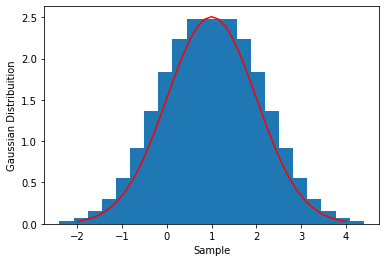

In [3]:
mu = 1
sigma = 1

x = np.linspace(-2, 4, 20)
probability = gaussian_distribution(x, mu, sigma)

plt.bar(x, probability)
plt.plot(np.linspace(-2, 4, 39), gaussian_distribution(np.linspace(-2, 4, 39), mu, sigma), c = 'r')
plt.ylabel('Gaussian Distribuition')
plt.xlabel('Sample')

Text(0.5, 0, 'Sample')

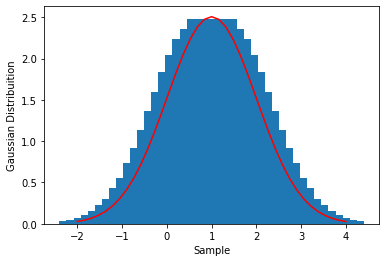

In [4]:
# _x and _probability are interpolated variables
_x = fill_sample(x)
_probability = fill_distribution(probability, _x)
plt.bar(_x, _probability)
plt.plot(np.linspace(-2, 4, 39), gaussian_distribution(np.linspace(-2, 4, 39), mu, sigma), c = 'r')
plt.ylabel('Gaussian Distribuition')
plt.xlabel('Sample')

## Likelihood

*For further reading, see* ***https://sites.warnercnr.colostate.edu/gwhite/wp-content/uploads/sites/73/2017/04/BinomialLikelihood.pdf*** 

Say we have a certain event with $P$ probability of happening. With $n$ occurencies, this particular event happended $r$ times, the likelihood will be given by

$$
\mathcal{L}(p|n, r) =\binom{n}{r} p^r (1-p)^{n-r}.
$$

# Lesson 2
***https://www.youtube.com/watch?v=XjFYc9ynagk&ab_channel=SandroDiasPintoVitenti***

## Describing data

As we are working with *hard sciences*, most of our data will be quantitative. This is a reflection of our main objective, which is to build probability distribution from basic theoretical principles.

We can divide quantitative data into two main fields: discrete and continuous.

* Discrete: Probabilities are countable;

* Continuous: Probabilities are uncountable.

## Statistics 

One is capable of building a map between discretes and continuos data with  histograms. For instance, given a colection of measurements of mass (*Data*)

$$
\{m_{i}\}_{i\in\left[1,N\right]} = D
$$

we shall build a set knots

$$
\{m_i^k\}_{i\in\left[1, M+1\right]},
$$

and 

$$
b_i = Count\{m_i^k \leq m_i < m_{i+1}^k\}.
$$

The set of $\{b_i\}_{i\in\left[1,M\right]}$ is a discrete set. Furthermore, this set has a reduced dimensionality. This could mean we are losing information, but there are ways for us to measure how good our set of *bins* is.

We call $b_i$ **statistics**. It is a function of our data, $b_i\left(D\right)$. Moreover, we will see differents examples of **statistics**.

### Mean

One possible sumary we can derive from our data is the *arithmetic mean*. It is defined as

$$
\overline{X}(D) \equiv \sum_{i=1}^N \frac{X_i}{N}\;.
$$

Additionaly, we can calculate the *mean* from function with

$$
\overline{f}(D) \equiv \sum_{i=1}^N \frac{f(x_i)}{N}\;.
$$

There are different *mean values*. For instance, we can summarize our data into the *geometric mean* with

$$
\overline{X}^g (D)\equiv \prod_{i=1}^N \left[X_i\right]^{\frac{1}{N}},
$$

which could usefully be written as

$$
\overline{X}^g (D) = e^{\sum_{i=1}^N\ln X_i/N}.
$$

There are two other *mean* values. *Harmonic mean* and *root mean square*, respectively given as

$$
H \equiv \frac{N}{\sum_{i=1}^N \frac{1}{X_i}},
$$

$$
RMS \equiv \sqrt{\frac{\sum_{i=1}^N X_i^2}{N}}.
$$

#### Example

Given three measurements,

In [5]:
x1 = 1
x2 = np.e
x3 = np.exp(5)
arr = np.array([x1, x2, x3])

print(f'x1: {x1}\nx2: {x2}\nx3: {x3}')

x1: 1
x2: 2.718281828459045
x3: 148.4131591025766


if we calculate the *arithmetic mean*, $\overline{X}$, we will find a value dominated by the biggest measurement, $e^5$.

In [6]:
x_bar = np.mean(arr)

print(f'x_bar: {x_bar}')

x_bar: 50.71048031034522


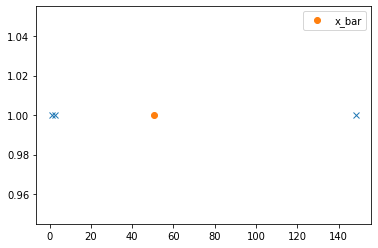

In [7]:
plt.plot(arr, len(arr) * [1], 'x')
plt.plot(x_bar, 1, 'o', label = 'x_bar')
plt.legend()
plt.show()

As we can see, the value of $\overline{X}$ is masked by the dispersion of this distribution. However, if we calculate $\overline{X}^g$, we find a reasonable description of our measurement.

In [8]:
from scipy.stats import gmean

In [9]:
x_barg = gmean(arr)

print(f'x_barg: {x_barg}')

x_barg: 7.38905609893065


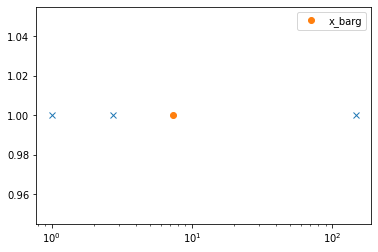

In [10]:
plt.plot(arr, len(arr) * [1], 'x')
plt.plot(x_barg, 1, 'o', label = 'x_barg')
plt.legend()
plt.xscale('log')
plt.show()

### Median

The *median* is the mean value of the midle terms from the ordenation of out sample.

Let us say that 
$$
Y_i = X_{\mathcal O(i)},\; where \; Y_{i} \leq Y_{i+1}.
$$ 

The *median* is $Y_{|\underline{N/2}|}$.

### Mode

*Mode* is the value with highest repetition from a sample.

$$
L_i = X_i,\; where \; Count\{X_i\}>Count\{X_j\}
$$

## Robust Statistics

**Robust statistics** is statistics with good performance for data drawn from a wide range of probability distributions, especially for distributions that are not normal. Robust statistical methods have been developed for many common problems, such as estimating location, scale, and regression parameters. One motivation is to produce statistical methods that are not unduly affected by outliers. [[Wiki]](https://en.wikipedia.org/wiki/Robust_statistics)

### Mean Absolute Deviation

The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.[[Khan]](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/other-measures-of-spread/a/mean-absolute-deviation-mad-review)

$$
\sum_{i=1}^N\frac{\left|X_i - \overline{X}\right|}{N}
$$

### Variance

Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.

$$
V(X) \equiv \frac{1}{N} \sum_{i=1}^N \left(X_i - \overline{X}\right)^2 = \overline{X^2} - \overline{X}^2
$$

### Standard Deviation

The standard deviation is a measure of the amount of variation or dispersion of a set of values.

$$
\sigma \equiv \sqrt{V(X)}
$$

### Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

$$
\gamma \equiv \frac{1}{N \sigma^3}\sum_{i=1}^N \left(X_i - \overline{X}\right)^3
$$

### Kurtosis

Kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution.

$$
K \equiv \frac{1}{N \sigma^4}\sum_{i=1}^N \left(X_i - \overline{X}\right)^4 - 3
$$

This extremely weird $-3$ is a normalization factor so that the *kurtosis* of the *Gaussian Distribuition* is **zero**.

### Central Moment

Given a estimator

$$
M_r \equiv \frac{1}{N} \sum_{i=1}^N \left(X_i - \overline{X}\right)^r = \overline{\left(X_i - \overline{X}\right)^r},
$$

called *central moment*, we are could describe a new summary

$$
\{\overline{X}, M_2, M_3, ..., M_N\}.
$$

This new summary is capable of correctly define all our data's information.

## Multivariable Data

Sometimes our measurements give rise to multiple information, *i.e.*,

$$
D = \{\left(X_i, Y_i)\right)\}_{i \in \left[1, N\right]}.
$$

In this case, we need to apply different **statistics** to summarize this information.

### Covariance

Covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive. 

In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the tendency in the linear relationship between the variables. [[Wiki]](https://en.wikipedia.org/wiki/Covariance)

$$
Cov\left(X,Y\right) \equiv \frac{1}{N} \sum_{i=1}^N \left(X_i - \overline{X}\right)\left(Y_i - \overline{Y}\right)
 $$

### Correlation

Correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related.[[Wiki]](https://en.wikipedia.org/wiki/Correlation)

Correlation is a normalized way of writing the covariance.

$$
Cor\left(X, Y\right) = \rho_{XY} \equiv \frac{Cov\left(X, Y\right)}{\sigma_X \sigma_Y}
$$

# Lesson 3

## Distribution

Let's say we have four identical coins. They have two sides - heads or tails - with an equal probability of arising. Taking a deeper look into the probabilities, we can build our distribution. They are the following

* Four tails: $\frac{1}{16}$
* Three tails: $\frac{4}{16}$
* Two tails: $\frac{6}{16}$
* One tail: $\frac{4}{16}$
* Four heads: $\frac{1}{16}$

Therefore, it is expected that if we toss our set of coins sixteen times, we should see this distribution. Let us create a simple example with a numerical analogy. In the next kernel, we will create an array with zeroes (tails) and ones (heads). You will probably see that is very unlikely our distribution matches with our random experiment.

In [11]:
import numpy as np

# Creates a numpy array of shape (16,4), filled with random integers between 0 (inclusive) and 2 (exclusive)
rand_array = np.random.randint(0, 2, (16,4)) 
rand_array

array([[1, 1, 1, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 1, 1, 0]])

## Law of Large Numbers

The **Law of Large Numbers** is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed.[[Wiki]](https://en.wikipedia.org/wiki/Law_of_large_numbers) Furthermore, as our sample grows, the empirical probability distribution narrows down to the theoretical distribution, *i.e.*

$$
\frac{n_i}{N} \rightarrow P_i \;| N\rightarrow \infty
$$

## Expected Values

**Expected value** (also called expectation, expectancy, mathematical expectation, mean, average, or first moment) is a generalization of the weighted average. Informally, the expected value is the arithmetic mean of a large number of independently selected outcomes of a random variable.[[Wiki]](https://en.wikipedia.org/wiki/Expected_value)

$$
\langle r\rangle  = \sum_r r P(r)\; .
$$

Moreover, one can find the expected value of a function with:

$$
\langle f\rangle  = \sum_r f(r) P(r)\; .
$$

It is easy to show that

$$
\langle f+g\rangle  = \sum_r \left(f(r)+g(r)\right) P(r) = \langle f\rangle  + \langle g\rangle \;,
$$

and if $P(r,s) = P_1(r)P_2(s)$, $f(r,s) = f(r)$ and $g(r,s) = g(s)$

$$
\langle fg\rangle  = \sum_{r,s} f(r)g(s) P_1(r)P_2(s) = \langle f\rangle \langle g\rangle \;.
$$

Let us roll back to our last example. What is the expected value of the number of tails?? Using the probability distribution we get:

$$
\langle r\rangle  = 0 \times \frac{1}{16} + 1 \times \frac{4}{16} + 2 \times \frac{6}{16} + 3 \times \frac{4}{16} + 4 \times \frac{1}{16} = \frac{32}{16} = 2   
$$

The most probable number of tails is two, and this seems like a reasonable answer.

## Probability Density

What if our random varible takes values from the $\mathcal{R}^1$? For instance, if the measurement of a certain ruller is $11 cm$, the probability of this value is

$$
\frac{n_{11cm}}{N} = P_{11cm}\;.
$$

However, since $N = \infty$, the probability for every possible value in the number line is $zero$. To counter this theoretical *conundrum*, we will create sections of our possible values. Given a sufficiently small $\varepsilon$, our new probability shall be written as

$$
\frac{n\left[(11cm - \varepsilon, 11cm + \varepsilon)\right]}{N} = P_{interval}\;.
$$

With this in mind, we will generaly redefine probability on a said interval $P[(a,b)] \equiv P(x)$.  Now we define $P'(x) = p(x)$, *i.e.*

$$
P(x) = \int p(x) dx\;,
$$
where $p(x)$ is the **Probability density**.


The **Probability density**, or density of a continuous random variable, is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would be close to that sample. In other words, while the absolute likelihood for a continuous random variable to take on any particular value is 0 (since there is an infinite set of possible values to begin with), the value of the PDF at two different samples can be used to infer, in any particular draw of the random variable, how much more likely it is that the random variable would be close to one sample compared to the other sample. [[Wiki]](https://en.wikipedia.org/wiki/Probability_density_function)

As well as we ahve done for discrete values, we can define expected values with the **probability density**. 

$$
\langle x\rangle  = \int_{-\infty}{^\infty} x p(x) dx\;;\\
\langle f\rangle  = \int_{-\infty}{^\infty} f(x) p(x) dx\;.
$$

## Binomial Distribution

The **Binomial distribution** with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $q = 1 − p$).[[Wiki]](https://en.wikipedia.org/wiki/Binomial_distribution)

Given a experiment, with two -and only two- possible outcomes $\{A, B\}$, the sum of probabilities $P_A$ and $P_B$ will be equal to $one$. Additionally, with $N$ events, the probability of only $p$ measurements being $A$ is
$$
P(p) = P_A^{p}P_B^{N-p}\binom{N}{p}\;.
$$

It is easy to check the normalization of our probability. If we sum the above expression for every possible $p$ we find
$$
\sum_p^N P(p) = \sum_p^N P_A^{p}P_B^{N-p}\binom{N}{p}\;.
$$
Where the right side is know as the binomial expansion [[Wiki]](https://en.wikipedia.org/wiki/Binomial_theorem), therefore
$$
\sum_p^N P(p) = (P_A + P_B)^N = 1\;.
$$

Moreover, we can calculate the expected value with a simple trick. Since $\langle p\rangle  = \sum_{p=0}^N p P(p)$, we will replace the probability of $p$ by its binomial form. The trick is to notice the value of $p$ in the expoent and as a factor of the sum. Then we shall write the binomial form times the value $p$ as a derivative.

$$
\langle p\rangle  = \sum_{p=0}^N p P_A^{p}P_B^{N-p}\binom{N}{p} = P_a \left[ \frac{\partial}{\partial P_A} \left( \sum_{p=0}^N P_A^p P_B^{N-p} \binom{N}{p} \right) \right] = P_A \frac{\partial}{\partial P_A}\left(P_A + P_B\right)^N\;,\\\langle p\rangle  = N P_A
$$

Furthermore, one can find the variance of the distribuition. We know the variance of a value is $\langle \alpha^2\rangle  - \langle \alpha\rangle ^2$. Using the derivation trick twice on the binomial form of $P(p)$ we find

$$
\langle p (p -1)\rangle  = P_A^2 \frac{\partial}{\partial P_A}\left(P_A + P_B\right)^N = P_A^2N(N-1)\;.
$$

Using the sum property for the expected value, it is clear that $\langle p^2\rangle  = P_A^2N(N-1) + \langle p\rangle $. Therefore, the variance will be

$$
\langle p^2\rangle  - \langle p\rangle ^2 = N P_A P_B
$$

# Lesson 4

## Poisson's Distribution

Suppose we have an average of $\lambda$ events that will happen in a given continuous interval $(a,b)$. Additionally, we subdivide our interval into $n$ equally sparsed sections. We begin by questioning what is the probability of $r$ events occurring in one particular section $n_x$.
$$
_a(- - -\;r- - - - - - - - - -)_b
$$

Based on the **Binomial distribution**, we shall fix the expected value $\langle r\rangle  = n P = \lambda$ as $n$ tends to $\infty$. With $P_B = 1-P_A$ and $P_A = \lambda / n$, we find:

$$
P(r) = \left(\frac{\lambda}{n}\right)^r \left(1 - \frac{\lambda}{n}\right)^{n-r} \binom{n}{r}\;.
$$

Moreover, using **Stirling approximation** we can reduce the above expression to:

$$
P(r) = e^{-\lambda}\frac{\lambda^r}{r!}\;.
$$

One can also prove that a poissonic distribution has variance of $\lambda$ and a standard deviation of $\sigma_r = \sqrt{\lambda}$.

## Gaussian Distribution

The Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\;.
$$

With a couple of tricks we can show that:

- The distribution is normalized, *i.e.*, $\int_{-\infty}^{\infty}f(x)dx = \int_{-\infty}^{\infty}dx\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}} = 1\;;$
- Its expected value $\langle x\rangle  = \int_{-\infty}^{\infty}x \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}dx  = \mu \;;$
- Its variance is $\langle (x-\mu)^2\rangle  = \int_{-\infty}^{\infty}dx (x-\mu)^2 \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}} = \sigma^2 \;.$

***P.S.:*** *This derivation would be a pain to do entirely in $\LaTeX$. There is a Xournal File in the repository with the complete analysis.* 

Additionally, we shall formally call $1\sigma$ the calculated area bellow the normal distribution between the interval $(\mu-\sigma, \mu+\sigma)$. This is an important value because it does not depend on $\sigma$ and $\mu$! By calculating the integral on a said interval, with a simple variable change we find:

$$
1\sigma = \int_1^1 \frac{e^{-\frac{y^2}{2}}}{\sqrt{2\pi}}dy \approx 0,6827...
$$

It is common to say that a certain event has a probability $1\sigma$ of happening. This is widely used as a range of confiability. As we get more $\sigma$, there will be a greater confiability of a certain expected value:

- $1\sigma = 0,6827...$
- $1,645\sigma = 0,9$
- $2\sigma = 0,9545...$
- $3\sigma = 0,9973...$

Bellow you can see a plot of this area.

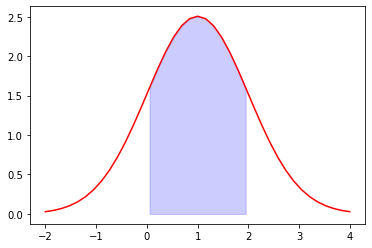

In [12]:
t = np.linspace(-2, 4, 39)
mu = 1
sigma = 1

plt.plot(t, gaussian_distribution(t, mu, sigma), c = 'r')

plt.fill_between(
        x= t, 
        y1= gaussian_distribution(t, mu, sigma), 
        where= (mu - sigma < t)&(t < mu + sigma),
        color= "b",
        alpha= 0.2)

## Multivariate Gaussian

Given a vector $\vec{x} \in \mathcal{M}^n$, the probability of measuring a certain value for $\vec{x}$ is:

$$
P(\vec{x}) = \frac{\exp\left[{\frac{- (\vec{x} - \vec{\mu})^T C^{-1} (\vec{x}-\vec{\mu})}{2}}\right]}{\left(\sqrt{2\pi}\right)^n \sqrt{det\;C}}\;.
$$

Where $C$ is a defined-positive symmetric matrix, *i.e.*, $\frac{\vec{v}^T C \vec{v}}{|\vec{v}|} > 0$ for every $\vec{v} \in \{v\}$ (a possible basis for $\mathcal{M}^n$). Furthermore, the *eigen-value* of $C$ is always:

$$
C\vec{v_i} = (\sigma^i)^2\vec{v_i}\;.
$$

Now, we shall prove that this distribution is normalized. The integral we need to evaluate is:

$$
\int_{-\infty}^{\infty}P(\vec{x})d^n x = \int_{-\infty}^{\infty} \frac{\exp\left[{\frac{- (\vec{x} - \vec{\mu})^T C^{-1} (\vec{x}-\vec{\mu})}{2}}\right]}{\left(\sqrt{2\pi}\right)^n \sqrt{det\;C}} d^n x\;.
$$

Let us call $\vec{x}-\vec{\mu} = \alpha^i\vec{v_i}$, therefore the derivative on ints components is $\frac{\partial x^i}{\partial \alpha^j} = v^i_j$. From the *eigen-value* equation, we find that $C^{-1}(\alpha^i\vec{ v_i}) =\sum_i \frac{1}{(\sigma^i)^2} (\alpha^i \vec{v_i})$. Furthermore, knowing that our basis $\{v\}$ is orthogonal means $\vec{v_i} \cdot \vec{v_j} = \delta_{ij}$, we can rewrite our integral as:

$$
\int_{-\infty}^{\infty}P(\vec{x})d^n x = \int_{-\infty}^{\infty} \frac{e^{-\sum_i \frac{(\alpha^i)^2}{2(\sigma^i)^2}}}{(\sqrt{2\pi})^n \prod_i (\sigma^i)} d^n \alpha\;.
$$

Where $\prod_i (\sigma^i) = \sqrt{det\;C}$, by diagonalizing the matrix in its *eigen-values*. One can see that for every $n$ possible index, $i$, we will find an integral with known value of $1$.

$$
\int_{-\infty}^{\infty} \frac{e^{-\frac{(\alpha^1)^2}{2(\sigma^1)^2}}}{\sqrt{2\pi} (\sigma^1)} d \alpha^1 \times \int_{-\infty}^{\infty} \frac{e^{-\frac{(\alpha^2)^2}{2(\sigma^2)^2}}}{\sqrt{2\pi} (\sigma^2)} d \alpha^2 \times \int_{-\infty}^{\infty} \frac{e^{-\frac{(\alpha^3)^2}{2(\sigma^3)^2}}}{\sqrt{2\pi} (\sigma^3)} d \alpha^3 \times ... \times \int_{-\infty}^{\infty} \frac{e^{-\frac{(\alpha^n)^2}{2(\sigma^n)^2}}}{\sqrt{2\pi} (\sigma^n)} d \alpha^n = 1
$$

## Central Limit Theorem

Suppose we have a random variable $Z$ given by the sum of random variables $x_i$, where $x_i$ are not identically independently distributed (i.i.d). The expected value of $Z$ is
$$
\langle Z\rangle  = \sum_{i=1}^N\langle x_i\rangle  = \sum_{i=1}^N \int d^n x P(x) x_i = \sum_{i=1}^N \mu_i\;,
$$
where $\mu_i$ is the mean value of $x_i$. The variance of $Z$ is
$$
V(Z) = \langle(Z - \langle Z \rangle)^2\rangle = \bigg \langle \left[\sum_{i=1}^N (x_i - \mu_i)\right]^2 \bigg \rangle = \bigg \langle \sum_{i=1}^N (x_i - \mu_i) \sum_{j=1}^N (x_j - \mu_j) \bigg \rangle\;,
$$
which can be divided into two expected values, one was $i=j$ and one with $i\ne j$. By doing this we find
$$
V(Z) = \bigg \langle \sum_{i=1}^N (x_i - \mu_i)^2 \bigg \rangle + \bigg \langle \sum_{i \ne j}^N (x_i - \mu_i)(x_j - \mu_j) \bigg \rangle = V_i + C_{ij}\;,
$$
where $V_i$ is the variance of every $x_i$ and $C_{ij}$ is the estimator of the covariance.

Reviewing our variable $Z$, we see that it has an expected value and variance given by the respective sum of its components, *i.e.*

- $\mu_Z = \sum \mu_i$;
- $V(Z) = \sum V_i$.

This information tells us that these values shall asymptotically ascend to a Gaussian distribution as $N$ tends to $\infty$.

The **Central limit theorem** establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.[[Wiki]](https://en.wikipedia.org/wiki/Central_limit_theorem)

# Lesson 5

## Estimators

Given a certain sample $\{x_i\}$ related to a particular distribution $P(\{x_i\})$, we say $f(\{x_i\})$ is a consistent estimator of $\theta$ -being $\theta$ a particular property of $P$- if $\lim_{N \to \infty} f(\{x_i\})= \theta$. Furthermore, $f(\{x_i\})$ will not be biased when $\langle f(\{x_i\}) \rangle = \theta$. Finnally, $f(\{x_i\})$ will be efficient if its variance is sufficiently small. A function $f(\{x_i\})$ that respects these three caracteristics is called an estimator. **VAGUE ಠ_ಠ**

### Examples

We already know the expected value of a distribution, $\mu = \langle x \rangle = \int x P(x) dx$. Based on the average value, we shall create a bunch of estimators.

* $\hat{\mu}_1 = \sum_{i=1}^N \frac{x_i}{N}$: Consistent, unbiased, and efficienty;

* $\hat{\mu}_2 = \sum_{i=1}^{Min(N, 10)} \frac{x_i}{Min(N, 10)}$: Unconsisten, unbiased, less efficient than $\hat{\mu}_1$ for $N>10$;

* $\hat{\mu}_3 = \sum_{i=1}^N \frac{x_i}{N-1}$: Consistent, biased, slightly less efficient than $\hat{\mu}_1$;

* $\hat{\mu}_4 = 1,8$: Consistent and unbiased if and only if $\mu = 1,8$, but infinitedly efficient;

* $\hat{\mu}_5 = \left( \prod_{i=1}^N x_i\right)^\frac{1}{N}$: Consistancy and efficiency depends on $P(x)$, bias depends on the expected value of $x$;

* $\hat{\mu}_6 = x_p$, where $x_p$ is the most frequent value of $\{x_i\}$: Consistancy, bias and efficiency depends on $P(x)$;

* $\hat{\mu}_7 = \frac{Max(\{x_i\}) + Min(\{x_i\})}{2}$: Consistancy, bias and efficiency depends on $P(x)$;

* $\hat{\mu}_8 = \sum_{i=1}^{|\underline{N/2}|} \frac{x_{2i}}{|\underline{N/2}|}$, where $|\underline{N/2}| = \frac{N}{2}$ for even $N$, and $|\underline{N/2}| = \frac{(N-1)}{2}$ for odd values: Consistent, unbiased, less efficient than $\hat{\mu}_1$.

We fall on the assumption that the first estimator is the best, but that is not true for every sample. As an exercise, you should check the consistency, efficiency, and bias of every estimator above.

## Likelihood and Fisher's Information

The likelihood function (often simply called the likelihood) describes the joint probability of the observed data as a function of the parameters of the chosen statistical model. For each specific parameter value $\theta$  in the parameter space, the likelihood function $P(X, \theta)$ therefore assigns a probabilistic prediction to the observed data $X$. Mathematically, we say that given an hypothesis $H_0$, the likelihood is
$$
\mathcal{L}\left(\{x_i\}|H_0\right) = \prod_{i=1}^N P(x_i|\theta)\;.
$$
The hypothesis encapsulates the functional form of $P(x_i)$ and the set of parameters $\{\theta\}$.

In terms of the likelihood, the expected value of a statistics is given by
$$
\langle f \rangle = \int d^n x f(\{x_i\}) \mathcal{L}\left(\{x_i\}|\vec{\theta}\right)\;.
$$
From now on, we will write $\mathcal{L}\left(\{x_i\}|\vec{\theta}\right)$ as $\mathcal{L}$. Now, say we have an unbiased estimator $\hat{\theta}(\{x_i\})$, then
$$
\langle \hat{\theta} \rangle = \int d^n x \hat{\theta}(\{x_i\}) \mathcal{L} = \theta \;,
$$
which is a simple function of $\theta$. Therefore, we can differentiate the right equation. By doing this we find
$$
\int d^n x \hat{\theta}(\{x_i\}) \frac{\partial \mathcal{L}}{\partial \theta} = 1\;.
$$
Dividing both sides by $\mathcal{L}$, and rewriting $\frac{1}{\mathcal{L}}\frac{\partial \mathcal{L}}{\partial \theta}$ as $\frac{\partial \ln \mathcal{L}}{\partial \theta}$ we get
$$
\int d^n x \hat{\theta}(\{x_i\}) \frac{\partial \ln \mathcal{L}}{\partial \theta} \mathcal{L} = 1\;.
$$

Beyond that, we know that the distribution is normalizes, *i.e*,
$$
\int d^n x \mathcal{L} = 1\;,
$$
were its derivative is
$$
\int d^n x \frac{\partial \mathcal{L}}{\partial \theta} = 0\; ;
$$

$$
\int  \frac{\partial \ln \mathcal{L}}{\partial \theta} \mathcal{L} d^n x = 0\;.
$$

This last equation can be seen as the expected value of $\frac{\partial \ln \mathcal{L}}{\partial \theta}$, therefore, this expression is a statistic with null expected value,
$$
\bigg \langle \frac{\partial \ln \mathcal{L}}{\partial \theta} \bigg \rangle = 0\;.
$$

Finnally, we subtract $\theta$ times the null integral from the unitary integral, *i.e*
$$
\int d^n x \left[\hat{\theta}(\{x_i\}) - \theta \right] \frac{\partial \ln \mathcal{L}}{\partial \theta} \mathcal{L} = 1\;.
$$

Before we go on, we must remind a little about the **Cauchy-Schwarz inequality**. We will use a possible generalization, when we define the norm of a function as
$$
\int f^*f d^n x = \int f^2 d^n x\;.
$$
Then, the inequality becomes
$$
\left(\int f^2 d^n x\right)\left(\int g^2 d^n x\right)\geq \left(\int fg d^n x\right)^2\;.
$$

If we set $f = \left[\hat{\theta}(\{x_i\}) - \theta \right] \sqrt{\mathcal{L}}$, and $g = \frac{\partial \ln \mathcal{L}}{\partial \theta} \sqrt{\mathcal{L}}$, knowing that the integral of their product is unitary, we find
$$
\left(\int \left[\hat{\theta}(\{x_i\}) - \theta \right]^2 \mathcal{L} d^n x\right)\left(\int \left[\frac{\partial \ln \mathcal{L}}{\partial \theta}\right]^2 \mathcal{L} d^n x\right)\geq 1\;.
$$
We can identify the first integral as $\langle \left(\hat{\theta}(\{x_i\}) - \theta \right)^2 \rangle = V(\hat{\theta})$, therefore,
$$
V(\hat{\theta}) \geq \frac{1}{\int \left[\frac{\partial \ln \mathcal{L}}{\partial \theta}\right]^2 \mathcal{L} d^n x}\;.
$$

The result we have found is of extreme importance! The variance of an unbiased estimator has a minimal value which depends only on our hypothesis about the distribution and its parameters. We have achieved this result without any data whatsoever. The denominator on the right side of the equation is called **Fisher Information**.

# Lesson 6

## Variance of a Estimator

Say we have and identically independently distributed (i.i.d) set $\{x_i\}$, where all possible values comes from the same distribution $P(x)$. Then, we can say that $\overline{x} = \sum_i^N \frac{x_i}{N}$ (arithmetic mean) is an estimator of the expected value , $\langle x \rangle = \mu$, *i.e.*,
$$
\hat{\mu} = \overline{x}\;.
$$

We can now calculate the variance of the estimator, $V(\hat{\mu}) = \langle \hat{\mu}^2 \rangle - \langle \hat{\mu} \rangle^2$. First, we calculate $\langle \hat{\mu}^2 \rangle$:
$$
\langle \hat{\mu}^2 \rangle = \bigg \langle \left(\sum_i^N \frac{x_i}{N} \right)^2 \bigg \rangle = \frac{1}{N}\bigg \langle \sum_i^N  x_i^2 \bigg \rangle + \frac{1}{N}\bigg \langle \sum_{i \ne j} x_i x_j \bigg \rangle\;\; \bigg |\;\langle x_i^2\rangle = V(x) + \mu^2\;,\langle x_i x_j \rangle = \mu^2\;;
$$
The sum over $i$ of a constant is $N$, and the sum over $i \neq j$ of a constant is $N^2-N$, therefore the variance of our estimator will be
$$
V(\hat{\mu}) = \frac{V(x)}{N}\;.
$$

This is a significant value because it says the variance of our estimator is more narrow than the variance of our distribution.

### Unbiased Variance

As we defined at the beginning of the course, the variance of a sample is
$$
\hat{V}(x) = \frac{1}{N} \sum_{i=1}^N \left(x_i - \overline{x}\right)^2\;.
$$
Now, that we have knowledge of estimators such as $\hat{\mu} = \overline{x}$, we can rewrite the expression above with this substitution, which gives us
$$
\hat{V}(x) = \frac{1}{N} \sum_{i=1}^N \left(x_i - \hat{\mu}\right)^2\ = \frac{1}{N} \sum_{i=1}^N \left( x_i^2 - 2x_i\hat{\mu} + 2\hat{\mu}^2 \right)\;.
$$

To validate the bias of $\hat{V}(x)$, its expected value should be equal to $\hat{V}(x)$. Therefore,
$$
\big \langle \hat{V}(x) \big \rangle = \frac{1}{N} \left[\sum_{i=1}^N \big \langle \left( x_i^2 - 2x_i\hat{\mu} + 2\hat{\mu}^2 \right)\big \rangle\right] = \frac{1}{N} \left[\sum_{i=1}^N \langle x_i^2 \rangle - \langle 2 \hat{\mu} \sum_{i=1}^N x_i \rangle + \langle \sum_{i=1}^N 2\hat{\mu}^2 \rangle  \right]\;.
$$
Replacing some known values from the last section we get
$$
\big \langle \hat{V}(x) \big \rangle = \frac{N-1}{N} V(x)\;.
$$

The previously defined variance is biased! Nevertheless, it is easy to eliminate such bias. We can simply redefine the variance as
$$
\hat{V}(x) = \frac{1}{N-1} \sum_{i=1}^N \left(x_i - \hat{\mu}\right)^2\;.
$$

### Variance of the Variance Estimator

!!HERE IT WOULD BE COOL TO PLOT AN INTERACTIVE GRAPH WITH MULTIPLE SAMPLES OF N VALUES AND ITS MEAN VALUES AND VARIANCE!!

It is also possible to calculate the variance of the variance estimator. It will be
$$
V(\hat{V}) = \big \langle \left(\hat{V} - \langle \hat{V} \rangle \right)^2\big \rangle = \bigg \langle \left( \frac{1}{N-1} \right)^2 \left( \sum_i (x_i - \hat{\mu}) \right)^2 \bigg \rangle = \frac{\sigma^4}{N}
$$

## Maximum Likelihood

Suppose we have a accurate functional form of a distribution $P(x_i|\theta)$, what should we expect from the likelihood $\mathcal{L}(\{x_i\}|\theta)$? Seems reasonable to think that a correct assumption will give us a maximal value of the likelihood function. 

**Maximum Likelihood Estimation** is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable [[Wiki]](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

We shall define a estimator $\hat{\theta} = Max\; \mathcal{L}(\{x_i\}|\theta)$, simply calculated by
$$
\frac{\partial \mathcal{L}}{\partial \theta} \bigg |_{\hat{\theta}} = 0\;.
$$

Furthermore, given the scale of number of which we are working with it is common practice to work with $\chi^2 = -2 \ln \mathcal{L}$. Then, the above estimator becomes $\hat{\theta} = Min\; (-2 \ln \mathcal{L})$.

In case we have more than one dimension, the maximization -or minimization- must be absolute, *i.e.*, the extreme value of every parameter. In other words, the gradient of the likelihood should be null. Otherwise, you will need to formulate a hypothesis for sets of parameters, since it is clearly difficult to have complete knowledge about the entirety of the space.

Additionally, say we have a likelihood of a sample $x_i$, given a set of parameters $\vec{\theta}$ and $\vec{\psi}$. These parameter are inversible functions of each other, *i.e.*, $\vec{\theta}(\vec{\psi})$ and $\vec{\psi}(\vec{\theta})$. If we try to extremize $\chi^2$, it is easy to see that a estimator is independent of the parametrization.

### Example

The likelihood of a gaussian distribution is
$$
\mathcal{L}(\{x_i\}|\mu_i\{\sigma_i\}) = \frac{\prod e^{-\frac{(x_i - \mu_i)^2}{2\sigma_i^2}}}{(\sqrt{2 \pi})^2\prod \sigma_i}\;,
$$
or
$$
\chi^2 = \sum \frac{(x_i - \mu)^2}{\sigma_i^2} + 2 \sum \ln \sigma_i + \frac{N}{2}\ln 2\pi\;.
$$

Taking the derivative of $\chi^2$ with respect to $\mu$, calculating it in a random estimator $\hat{\mu}$, and setting it to zero to extremize, we get
$$
\frac{\partial \chi^2}{\partial \mu} \bigg |_{\hat{\mu}} = -2\sum \frac{(x_i - \hat{\mu})}{\sigma_i^2}=0\;.
$$

If we call $w_i = 1/\sigma^2$ and $w = \sum w_i$, the right equation becomes
$$
\sum w_i x_i - \hat{\mu}\sum w_i = 0\;,
$$
which gives us the estimator with maximum likelihood,
$$
\hat{\mu} = \frac{1}{w}\sum_i w_i x_i\;.
$$
This is the weighted average. Furthermore, if every $\sigma_i = \sigma$, then $w = N/\sigma^2$, and
$$
\hat{\mu} = \frac{1}{N}\sum_i x_i\;,
$$
which tells us the arithmetic mean also is an estimator with maximum likelihood.

On top of that, if we want to find a the concurrent estimator with maximum likelihood for $\sigma$, we take the derivative with respect to $\sigma$ instead of $\mu$. Doing so, we find
$$
\frac{\partial \chi^2}{\partial \sigma} \bigg |_{\hat{\sigma}} = -\frac{2}{\hat{\sigma}^3}\sum (x_i - \hat{\mu})^2 + \frac{2N}{\hat{\sigma}} = 0\;;
$$
$$
\hat{\sigma}^2 =\sum  \frac{(x_i - \hat{\mu})^2}{N}\;.
$$
We see that $\hat{\sigma}^2$ is the estimator of variance with maximum likelihood. Notice that this estimator is biased. The reason for that is the freedom of parametrization we previously discussed.

### Supernovae Example